In [1]:
import pandas as pd
import numpy as np
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('GS.csv',parse_dates= ['Date'])
df.set_index('Date',inplace=True)

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-05-04,76.0000,77.250,70.0000,70.3750,54.440052,22320900
1999-05-05,69.8750,69.875,66.2500,69.1250,53.473076,7565700
1999-05-06,68.0000,69.375,67.0625,67.9375,52.554470,2905700
1999-05-07,67.9375,74.875,66.7500,74.1250,57.340931,4862300
1999-05-10,73.3750,73.500,70.2500,70.6875,54.681774,2589400


In [4]:
train_size = int(len(df)*0.8)
train_size
test_size = len(df)-train_size
test_size

1116

In [5]:
df2 = df[['Adj Close']]

In [6]:
df2 = df2.asfreq('b')

In [7]:
df2

,Adj Close
Date,
1999-05-04,54.440052
1999-05-05,53.473076
1999-05-06,52.554470
1999-05-07,57.340931
1999-05-10,54.681774
...,...
2021-06-24,368.750000
2021-06-25,368.769989
2021-06-28,368.709991


In [8]:
df2  = df2.fillna(method='ffill')

In [9]:
df_train = df2[:train_size]
df_train
df_test = df2[train_size:]
df_test

,Adj Close
Date,
2016-06-08,142.082199
2016-06-09,140.731583
2016-06-10,137.717941
2016-06-13,136.560257
2016-06-14,134.318420
...,...
2021-06-24,368.750000
2021-06-25,368.769989
2021-06-28,368.709991


In [10]:
sts.adfuller(df_train)

(-1.974337965583405,
 0.2979370983216577,
 10,
 4450,
 {'1%': -3.431820354190133,
  '5%': -2.8621897198837396,
  '10%': -2.567115849715945},
 20340.737330843032)

In [11]:
df_train_log = np.log(df_train)
df_train_log

,Adj Close
Date,
1999-05-04,3.997100
1999-05-05,3.979178
1999-05-06,3.961850
1999-05-07,4.049015
1999-05-10,4.001530
...,...
2016-06-01,4.990292
2016-06-02,4.985970
2016-06-03,4.963044


In [12]:
sts.adfuller(df_train_log)

(-2.5397852560478347,
 0.10609172474091239,
 30,
 4430,
 {'1%': -3.431826996210462,
  '5%': -2.8621926541301295,
  '10%': -2.567117411757512},
 -20490.90958080197)

In [13]:
df_diff_log = df_train_log - df_train_log.shift()

In [14]:
sts.adfuller(df_diff_log[1:])

(-10.704521011905351,
 3.454988924754835e-19,
 29,
 4430,
 {'1%': -3.431826996210462,
  '5%': -2.8621926541301295,
  '10%': -2.567117411757512},
 -20481.065052541857)

Text(0.5, 1.0, 'Auto')

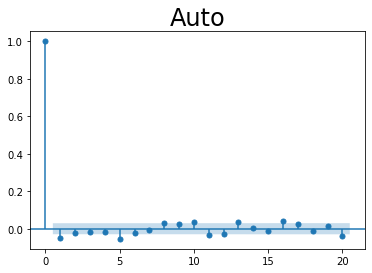

In [15]:
sgt.plot_acf(df_diff_log[1:],lags=20)
plt.title("Auto",size=24)

Text(0.5, 1.0, 'Partial Auto')

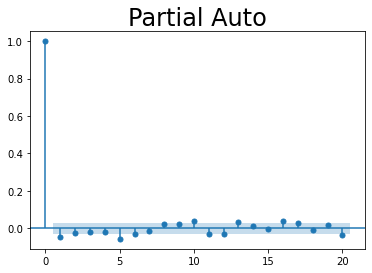

In [16]:
sgt.plot_pacf(df_diff_log[1:],lags=20)
plt.title("Partial Auto",size=24)

In [17]:
from pmdarima import auto_arima

In [18]:
#result = auto_arima(df_train_log,trace=True, suppress_warnings=True)

In [19]:
model1 = ARIMA(df_train_log,order=(3,1,3))
result1 =model1.fit()

In [20]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Adj Close   No. Observations:                 4460
Model:                 ARIMA(3, 1, 3)   Log Likelihood               10300.936
Method:                       css-mle   S.D. of innovations              0.024
Date:                Wed, 14 Jul 2021   AIC                         -20585.871
Time:                        11:18:51   BIC                         -20534.648
Sample:                    05-05-1999   HQIC                        -20567.814
                         - 06-07-2016                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0003      0.000      0.876      0.381      -0.000       0.001
ar.L1.D.Adj Close    -0.1653      0.184     -0.896      0.370      -0.527       0.196
ar.L2.D.Adj Close    -0.1124      0.302     -0.372      0.710      -0.704       0.479
ar.L3.D.Adj Close     0.5082      0.084      6.022      0.000       0.343       0.674
ma.L1.D.Adj Close     0.1213      0.179      0.678      0.498      -0.229       0.472
ma.L2.D.Adj Close     0.0628      0.292      0.215      0.830      -0.510       0.636
ma.L3.D.Adj Close    -0.5586      0.044    -12.655      0.000      -0.645      -0.472
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.6007           -1.0113j            1.1762           -0.3353
AR.2           -0.6007           +1.0113j            1.1762            0.3353
AR.3            1.4224           -0.0000j            1.4224           -0.0000
MA.1           -0.6009           -1.0006j            1.1671           -0.3361
MA.2           -0.6009           +1.0006j            1.1671            0.3361
MA.3            1.3142           -0.0000j            1.3142           -0.0000
-----------------------------------------------------------------------------
"""

In [21]:
model0 = ARIMA(df_train_log,order=(0,1,1))
result0 = model0.fit()

In [22]:
result0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Adj Close   No. Observations:                 4460
Model:                 ARIMA(0, 1, 1)   Log Likelihood               10294.691
Method:                       css-mle   S.D. of innovations              0.024
Date:                Wed, 14 Jul 2021   AIC                         -20583.381
Time:                        11:18:52   BIC                         -20564.173
Sample:                    05-05-1999   HQIC                        -20576.610
                         - 06-07-2016                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0002      0.000      0.632      0.528      -0.000       0.001
ma.L1.D.Adj Close    -0.0499      0.015     -3.245      0.001      -0.080      -0.020
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           20.0249           +0.0000j           20.0249            0.0000
-----------------------------------------------------------------------------
"""

In [23]:
def LLR_test(model1,model2,DF=1):
    l1 = model1.fit().llf
    l2 = model2.fit().llf
    lr = (2*(l2-l1))
    p = chi2.sf(lr,DF).round(3)
    return p

In [24]:
LLR_test(model0,model1)

0.0

In [25]:
model3 = ARIMA(df_train_log,order=(1,1,0))
result3 = model3.fit()

In [26]:
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Adj Close   No. Observations:                 4460
Model:                 ARIMA(1, 1, 0)   Log Likelihood               10294.408
Method:                       css-mle   S.D. of innovations              0.024
Date:                Wed, 14 Jul 2021   AIC                         -20582.817
Time:                        11:18:54   BIC                         -20563.608
Sample:                    05-05-1999   HQIC                        -20576.045
                         - 06-07-2016                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0002      0.000      0.628      0.530      -0.000       0.001
ar.L1.D.Adj Close    -0.0472      0.015     -3.156      0.002      -0.077      -0.018
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -21.1838           +0.0000j           21.1838            0.5000
-----------------------------------------------------------------------------
"""

In [27]:
LLR_test(model3,model1)

0.0

In [28]:
diff= df_train_log -df_train_log.shift()

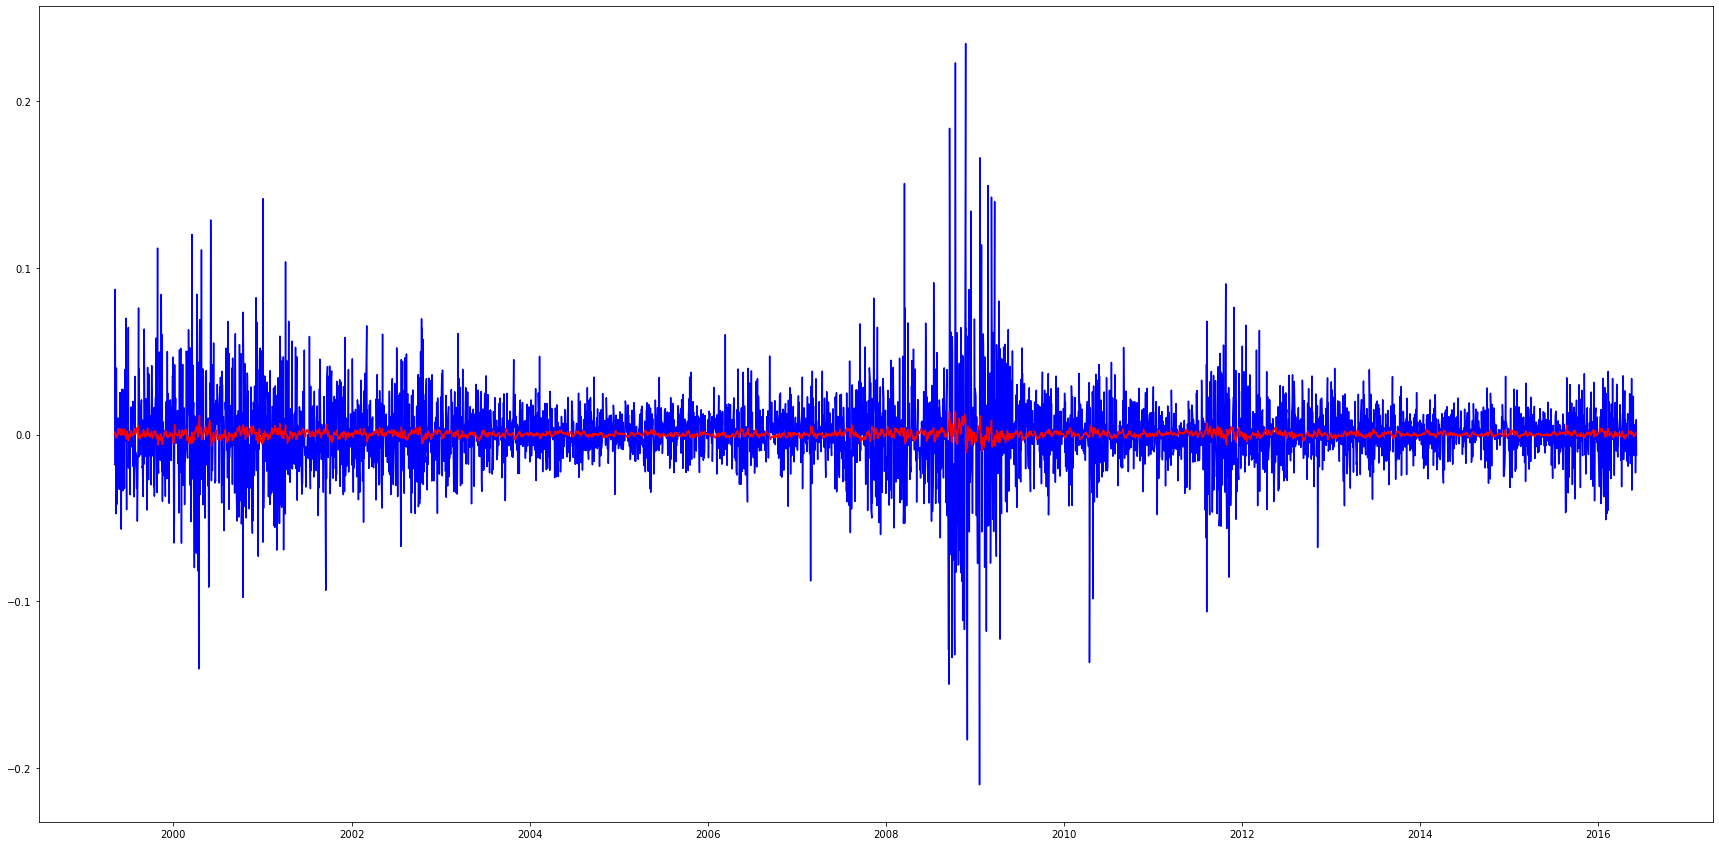

In [29]:
plt.figure(figsize = (30,15))
plt.plot(diff,color='Blue')
plt.plot(result1.fittedvalues,color='red')

In [30]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Adj Close   No. Observations:                 4460
Model:                 ARIMA(3, 1, 3)   Log Likelihood               10300.936
Method:                       css-mle   S.D. of innovations              0.024
Date:                Wed, 14 Jul 2021   AIC                         -20585.871
Time:                        11:18:56   BIC                         -20534.648
Sample:                    05-05-1999   HQIC                        -20567.814
                         - 06-07-2016                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0003      0.000      0.876      0.381      -0.000       0.001
ar.L1.D.Adj Close    -0.1653      0.184     -0.896      0.370      -0.527       0.196
ar.L2.D.Adj Close    -0.1124      0.302     -0.372      0.710      -0.704       0.479
ar.L3.D.Adj Close     0.5082      0.084      6.022      0.000       0.343       0.674
ma.L1.D.Adj Close     0.1213      0.179      0.678      0.498      -0.229       0.472
ma.L2.D.Adj Close     0.0628      0.292      0.215      0.830      -0.510       0.636
ma.L3.D.Adj Close    -0.5586      0.044    -12.655      0.000      -0.645      -0.472
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.6007           -1.0113j            1.1762           -0.3353
AR.2           -0.6007           +1.0113j            1.1762            0.3353
AR.3            1.4224           -0.0000j            1.4224           -0.0000
MA.1           -0.6009           -1.0006j            1.1671           -0.3361
MA.2           -0.6009           +1.0006j            1.1671            0.3361
MA.3            1.3142           -0.0000j            1.3142           -0.0000
-----------------------------------------------------------------------------
"""

In [31]:
pred_result1_diff = pd.Series(result1.fittedvalues,copy= True)
pred_result1_diff.head()

Date
1999-05-05    0.000256
1999-05-06    0.000972
1999-05-07    0.001715
1999-05-10   -0.001982
1999-05-11   -0.000436
Freq: B, dtype: float64

In [32]:
pred_result1_diff_sum = pred_result1_diff.cumsum()

In [33]:
pred_result1_diff_sum

Date
1999-05-05    0.000256
1999-05-06    0.001228
1999-05-07    0.002943
1999-05-10    0.000961
1999-05-11    0.000525
                ...   
2016-06-01    1.177865
2016-06-02    1.177576
2016-06-03    1.177780
2016-06-06    1.179005
2016-06-07    1.179842
Freq: B, Length: 4460, dtype: float64

In [34]:
pred_result1_log = pd.Series(df_train_log['Adj Close'].iloc[0],index=  df_train_log.index)
pred_result1_log

Date
1999-05-04    3.9971
1999-05-05    3.9971
1999-05-06    3.9971
1999-05-07    3.9971
1999-05-10    3.9971
               ...  
2016-06-01    3.9971
2016-06-02    3.9971
2016-06-03    3.9971
2016-06-06    3.9971
2016-06-07    3.9971
Freq: B, Length: 4461, dtype: float64

In [35]:
pred_result1_log = pred_result1_log.add(pred_result1_diff_sum,fill_value=0)

In [36]:
pred_result1_log

Date
1999-05-04    3.997100
1999-05-05    3.997356
1999-05-06    3.998328
1999-05-07    4.000043
1999-05-10    3.998061
                ...   
2016-06-01    5.174965
2016-06-02    5.174676
2016-06-03    5.174880
2016-06-06    5.176105
2016-06-07    5.176942
Freq: B, Length: 4461, dtype: float64

In [37]:
pred_ARIMA = np.exp(pred_result1_log)

In [38]:
pred_ARIMA


Date
1999-05-04     54.440052
1999-05-05     54.454004
1999-05-06     54.506961
1999-05-07     54.600504
1999-05-10     54.492375
                 ...    
2016-06-01    176.790419
2016-06-02    176.739346
2016-06-03    176.775341
2016-06-06    176.992106
2016-06-07    177.140320
Freq: B, Length: 4461, dtype: float64

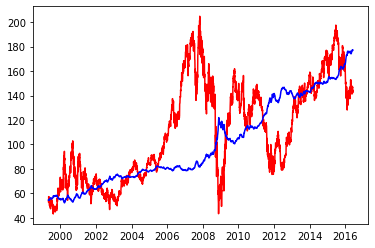

In [39]:
plt.plot(df_train,color='Red')
plt.plot(pred_ARIMA,color='Blue')

In [40]:
test_pred = result1.predict(start=4461,end=5782,dynamic=True)
test_pred = pd.DataFrame(test_pred)
test_pred

,0
2016-06-08,0.001381
2016-06-09,0.000752
2016-06-10,0.000996
2016-06-13,0.000650
2016-06-14,0.000360
...,...
2021-06-25,0.000256
2021-06-28,0.000256
2021-06-29,0.000256
2021-06-30,0.000256


In [41]:
#first = df_train_log.iloc[train_size-1]
first = pred_result1_log[len(pred_result1_log)-1]
first

5.176942185894327

In [42]:
# first[0]
# test_pred.iloc[0] += first[0]
# test_pred
first
test_pred.iloc[0] += first
test_pred

,0
2016-06-08,5.178323
2016-06-09,0.000752
2016-06-10,0.000996
2016-06-13,0.000650
2016-06-14,0.000360
...,...
2021-06-25,0.000256
2021-06-28,0.000256
2021-06-29,0.000256
2021-06-30,0.000256


In [43]:
df_test_log = np.log(df_test)

In [44]:
df_test_log

,Adj Close
Date,
2016-06-08,4.956406
2016-06-09,4.946854
2016-06-10,4.925208
2016-06-13,4.916766
2016-06-14,4.900213
...,...
2021-06-24,5.910119
2021-06-25,5.910173
2021-06-28,5.910010


In [45]:
test_pred = test_pred.cumsum()
test_pred

,0
2016-06-08,5.178323
2016-06-09,5.179075
2016-06-10,5.180071
2016-06-13,5.180721
2016-06-14,5.181081
...,...
2021-06-25,5.518261
2021-06-28,5.518518
2021-06-29,5.518774
2021-06-30,5.519030


In [46]:
test_ARIMA = np.exp(test_pred)
test_ARIMA

,0
2016-06-08,177.385081
2016-06-09,177.518602
2016-06-10,177.695451
2016-06-13,177.810935
2016-06-14,177.875003
...,...
2021-06-25,249.201377
2021-06-28,249.265243
2021-06-29,249.329126
2021-06-30,249.393025


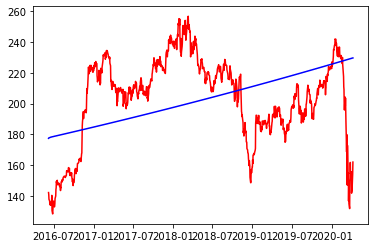

In [47]:
plt.plot(df_test[:1000],color='Red')
plt.plot(test_ARIMA[:1000],color='Blue')

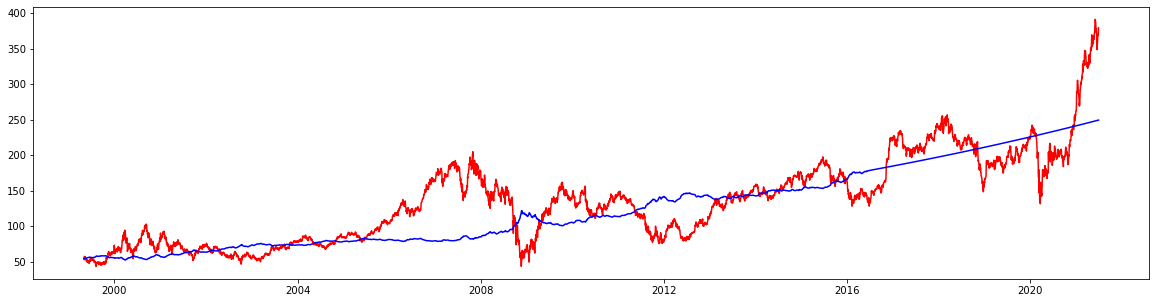

In [48]:
plt.figure(figsize=(20,5))
plt.plot(df_train,color='Red')
plt.plot(df_test,color='Red')
plt.plot(pred_ARIMA,color='Blue')
plt.plot(test_ARIMA,color='Blue')

In [49]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(np.array(df_test[:1000]),np.array(test_ARIMA[:1000]))

ValueError: continuous is not supported